 This dataset is from the Forage British Airways job simulation. The original task was to build a predictive model, but here I focused on exploring booking patterns and generating business insights first. All analysis and code are written from my own knowledge, so there may be room for improvements, and you can modify the code as per your liking to enhance your practice.

In [44]:
import pandas as pd
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [46]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: xlabel='booking_complete'>

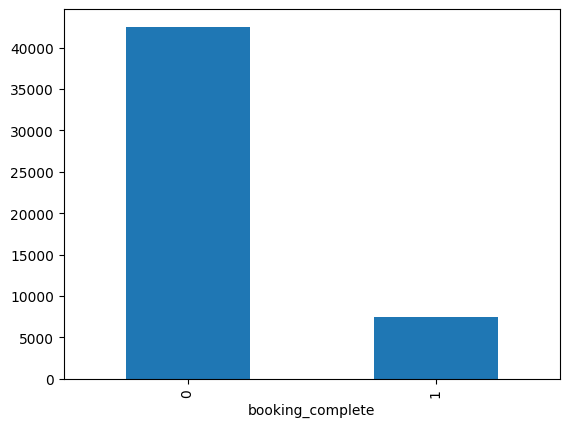

In [47]:
df['booking_complete'].value_counts().plot(kind='bar')

In [48]:
percentage = df['booking_complete'].value_counts(normalize=True) * 100
percentage


booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64

So, we have imbalanced data. And 14.9 ~ 15% of poeple have completed the booking in the data. 

In [49]:
# No. of flights everyday
day = df.groupby('flight_day')['booking_complete'].value_counts().unstack()
day['book_pct'] = (day[1]/(day[1]+day[0]))*100
day

booking_complete,0,1,book_pct
flight_day,,,
Fri,5778,983,14.539269
Mon,6898,1204,14.860528
Sat,4951,861,14.814178
Sun,5627,927,14.144034
Thu,6302,1122,15.113147
Tue,6544,1129,14.713932
Wed,6422,1252,16.314829


People complete most of the booking 16% on wednesday.

In [50]:
# bookings by flight hour everyday
hour = df.groupby('flight_hour')['booking_complete'].value_counts().unstack()
hour['book_pct'] = (hour[1]/(hour[1]+hour[0]))*100
hour

booking_complete,0,1,book_pct
flight_hour,,,
0,1357,182,11.825861
1,1804,285,13.642891
2,2253,389,14.723694
3,2262,393,14.802260
4,2413,430,15.124868
5,2420,431,15.117503
6,2562,488,16.000000
7,2703,423,13.531670
8,2681,484,15.292259


Most bookings are completed between 4 to 6 PM

In [51]:
df.groupby('booking_complete')['flight_hour'].mean()

booking_complete
0    9.050162
1    9.158331
Name: flight_hour, dtype: float64

In [52]:
df.groupby('booking_complete')['length_of_stay'].mean()

booking_complete
0    23.647218
1    19.617679
Name: length_of_stay, dtype: float64

On average people who complete the bookings their length of stay is lower(19 days) than the poeple who do not complete the bookings (23 days)

In [53]:
#On average what is the purchase lead for completed bookings?
df.groupby('booking_complete')['purchase_lead'].median()

booking_complete
0    52.0
1    46.0
Name: purchase_lead, dtype: float64

The average no. of days between travel and booking date for poeple who complete the booking is 80 days whil efor teh ones who do not compelte the bookings his 85 days. (And median for complete bookings is 46 days while for non-complete ones is 52 days)

In [54]:
# Are longer flight duration flights get complete booking as compared to the short travels?
df.groupby('booking_complete')['flight_duration'].median()

booking_complete
0    7.57
1    6.62
Name: flight_duration, dtype: float64

Flight duration for people completeing the bookings(6.62) are shorter then teh one no completing(7.57).

In [55]:
# do people travelling alone complete the booking as compared to people traveling with a partner?
df['is_alone'] = df['num_passengers'].apply(lambda x : 1 if x == 1 else 0)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_alone
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,1
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,1
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,1


In [56]:
df.groupby('is_alone')['booking_complete'].value_counts(normalize = True).unstack()

booking_complete,0,1
is_alone,,
0,0.837891,0.162109
1,0.857904,0.142096


people with a partner have completed more bookings (16%) as compared to alone (14%)

In [57]:
# From where the most bookings are made?
df['booking_origin'].value_counts().head()

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Name: count, dtype: int64

In [58]:
# Which route has the most bookings?
df['route'].value_counts().head(5)

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
Name: count, dtype: int64

In [59]:
# What percentage of bookings are completed for according to trip type?
trip = df.groupby('trip_type')
trip_df = trip['booking_complete'].value_counts().unstack()
trip_df['book_pct'] = (trip_df[1]/(trip_df[1]+trip_df[0]))*100
trip_df

booking_complete,0,1,book_pct
trip_type,,,
CircleTrip,111,5,4.310345
OneWay,367,20,5.167959
RoundTrip,42044,7453,15.057478


So 15% of RoundTrip customers complete the booking whereas thsi number goes down to 5% for One Way Trip customers and 4% to CircleTrip customers.

In [60]:
# Do people who want baggae option complete more booking process?

bagg = df.groupby('wants_extra_baggage')['booking_complete'].value_counts().unstack()
bagg['book_pct'] = (bagg[1]/(bagg[1]+bagg[0]))*100
bagg

booking_complete,0,1,book_pct
wants_extra_baggage,,,
0,14656,1905,11.502929
1,27866,5573,16.666168


The poeple who want extra baggage space have completed booking (16%) as comapred to peopel  who do not want baggage (11%)

In [61]:
# Do people who wants preferred seat complete more booking process?

seat = df.groupby('wants_preferred_seat')['booking_complete'].value_counts().unstack()
seat['book_pct'] = (seat[1]/(seat[1]+seat[0]))*100
seat

booking_complete,0,1,book_pct
wants_preferred_seat,,,
0,30303,4849,13.794379
1,12219,2629,17.706088


17% of People who wants a preferred seat complete the bookings. While 13% poeple complete the bookings who do not want a preferred seat.

In [62]:
# Do people who wants in flight meals complete more booking process?

meal = df.groupby('wants_in_flight_meals')['booking_complete'].value_counts().unstack()
meal['book_pct'] = (meal[1]/(meal[1]+meal[0]))*100
meal

booking_complete,0,1,book_pct
wants_in_flight_meals,,,
0,24593,4050,14.139580
1,17929,3428,16.050943


16% of people who want in flight meals complete the booking while 14% of them do not complete the booking.

In [63]:
# Which sales channel make most of the bookings?
cross = pd.crosstab(df['booking_complete'], df['sales_channel'])
cross
 

sales_channel,Internet,Mobile
booking_complete,,
0,37513,5009
1,6869,609


people who use internet complete more bookings as compared to the one who use mobiles.
Maybe the interface is not that great. And can be simplified.

In [64]:
pd.crosstab(df['trip_type'], df['wants_extra_baggage'], 
            values=df['booking_complete'], aggfunc='mean')


wants_extra_baggage,0,1
trip_type,,
CircleTrip,0.160000,0.010989
OneWay,0.026786,0.061818
RoundTrip,0.115563,0.167962


## Booking Completion Analysis

### Overall Conversion
Only ~15% of bookings are completed, indicating a significant drop‑off issue.

### Timing
Bookings are most likely to be completed on Wednesdays (16%).
Flights around 4–6 PM see the highest completion rates.

### Customer Profile
Round‑trip travelers complete 15% of bookings, while one‑way and circle trips lag (<6%).
Group travelers (2+ passengers) complete more bookings (16%) than solo travelers (14%).
Completed bookings have a shorter average stay (19 days) and are made slightly earlier (80 days vs 85).

### Flight Characteristics
Shorter flights (median 6.6 hrs) bookings complete more often than longer flights (7.5 hrs).
Key origins include Australia, Malaysia, South Korea, Japan, and China.

### Ancillary Services
Customers requesting extra baggage (16.6%), preferred seats (17.7%), or in‑flight meals (16%) show higher booking completion vs those who don’t (~13–14%).
Interest in add‑ons is a strong indicator of booking intent.

### Sales Channels
Internet bookings account for the majority of completions vs mobile.
Mobile channel shows a weaker conversion rate BA could improve its mobile booking experience (UX simplification, faster payment gateways)

### Recommendations
Improve mobile booking interface to boost conversion.
Target round‑trip and group travelers with bundles and offers.
Leverage ancillary demand as a signal for high‑intent customers upsell and remarket accordingly.
Schedule midweek and afternoon promotions to align with natural booking patterns.